## **Introducción**
 
Las aerolíneas tienen pasajeros todos los días del año, por lo que poder encontrar qué es lo que los motiva a brindar una buena calificación sobre su vuelo es de grán valor. 
 
 
## **Problema comercial.** 
 
La tarea principal es formatear los datos proporcionados y proporcionar visualizaciones que respondan las preguntas específicas que tiene el cliente que se mencionan a continuación.(en este caso nosotros seríamos nuestro propio cliente).
 
##**Contexto analítico**. 
 
Se le proporciona un archivo CSV (almacenado en la carpeta datos ya creada) que contiene el nivel de satisfacción de pasajeros en conjunto con calificaciones sobre características del vuelo que tomó y también características personales del individuo. El delimitador en el archivo CSV dado es ̈"," en lugar del predeterminado ̈";".Se realizarán las siguientes tareas con los datos.
 
 
1.  Leer, transformar y preparar los datos para su visualización
2.  Realizar análisis y construir visualizaciones de los datos para identificar patrones en el conjunto de datos. 
3. Llegar a conclusiones concretas a través de nuestro análisis.
 
El cliente tiene un conjunto específico de preguntas a las que le gustaría obtener respuestas. Deberá proporcionar visualizaciones para acompañar estos:
 
1) ¿ Son significativas las variables utilizadas dentro de los modelos con respecto a nuestra variable objetivo ? 
 
1.2) Si las hay ¿ Cuáles son ?
 
 
2) ¿ Es la edad un condicional para determinar el nivel de satisfacción de un pasajero ?
 
3) Podremos determinar el nivel de satisfacción de un pasajero conociendo solo su género ?


## Hipotesis: 

1) La edad será una de las variables mas significativas del modelo.

2 ) La variable objetivo dependerá de la clase en la que los pasajeros viajaron.

3 ) Existen más calificaciones positivas que negativas.



In [ ]:
import numpy as np
import pandas as pd
from pandas.io.parsers.readers import read_csv
sheet_url = 'https://docs.google.com/spreadsheets/d/1x54nPXbjnE_r9xrD2D0xy7wessVmaJ_WM5ZGDDA41lo/export?format=csv&gid=907629546'
df = pd.read_csv(sheet_url, sep=",")
df.head()
## Df.head para poder tener una primer imagen de como es nuestro data set.

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [ ]:
## Los códigos que se ven dentro de esta session muestran casi por completo todas las librerías que serán utilizadas dentro de nuestro proyecto.
## Las explicaciones al significado de los nombres de las librerías se detallan en otra sección del proyecto.


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
import os
import numpy as np
from pandas.io.parsers.readers import read_csv
from scipy import stats
sheet_url = 'https://docs.google.com/spreadsheets/d/1x54nPXbjnE_r9xrD2D0xy7wessVmaJ_WM5ZGDDA41lo/export?format=csv&gid=907629546'
yu = pd.read_csv(sheet_url, sep=",")
yu.head()
import statsmodels.formula.api as sm
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV

Les asignamos a nuestras vairables categóricas numeros para que puedas ser leídas por nuestros modelos y además reemplazamos los N/A con valores medios.   

In [ ]:
yuu = pd.get_dummies(data=yu , drop_first=True) ## La función get_dummies asigna valores númericos a nuetras variables categóricas. 
yuu.fillna(yuu.mean(), inplace=True) ## La función fillna nos rellena los valores n/a. En este caso se opto por elegir que se llene con los valores medios. 

## Overview de la data

Analicemos las columnas precentes en el data frame


In [ ]:
yuu.head() 
## Volvemos a tirar el codigo head pero esta vez podemos ver que las variables escritas ahora fueron reemplazadas por numeros de entre 0 y 1.

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus,Satisfaction_Satisfied
0,1,48,821,2,5.0,3,3,4,3,3,...,5,3,5,5,1,0,0,0,0,0
1,2,35,821,26,39.0,2,2,3,5,2,...,5,2,5,5,0,1,0,0,0,1
2,3,41,853,0,0.0,4,4,4,5,4,...,3,4,3,3,1,1,0,0,0,1
3,4,50,1905,0,0.0,2,2,3,4,2,...,5,2,5,5,1,1,0,0,0,1
4,5,49,3470,0,1.0,3,3,3,5,3,...,3,3,3,3,0,1,0,0,0,1


In [ ]:
yuu.columns ## Aquí podemos ver todos los titulos de nuetras colunmas.

Index(['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Gender_Male',
       'Customer Type_Returning', 'Type of Travel_Personal', 'Class_Economy',
       'Class_Economy Plus', 'Satisfaction_Satisfied'],
      dtype='object')

In [ ]:
yuu.dtypes ## Aquí podemos ver en que formato se encuentrar categorizados nuestros datos.

ID                                          int64
Age                                         int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64
In-flight Entertainment                     int64
Baggage Handling                            int64
Gender_Male                                 uint8


In [ ]:
yuu.info ## Una overwiew de nuestro data set.

<bound method DataFrame.info of             ID  Age  Flight Distance  Departure Delay  Arrival Delay  \
0            1   48              821                2            5.0   
1            2   35              821               26           39.0   
2            3   41              853                0            0.0   
3            4   50             1905                0            0.0   
4            5   49             3470                0            1.0   
...        ...  ...              ...              ...            ...   
129875  129876   28              447                2            3.0   
129876  129877   41              308                0            0.0   
129877  129878   42              337                6           14.0   
129878  129879   50              337               31           22.0   
129879  129880   20              337                0            0.0   

        Departure and Arrival Time Convenience  Ease of Online Booking  \
0                            

## Obteniendo los datos relevantes


In [ ]:
yuu.groupby(['Satisfaction_Satisfied']).mean() ## Esta función nos muestra la media de cada variable con respecto a nuestra variable objetivo. (satisfacción)

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,...,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Gender_Male,Customer Type_Returning,Type of Travel_Personal,Class_Economy,Class_Economy Plus
Satisfaction_Satisfied,,,,,,,,,,,,,,,,,,,,,
0,64507.311428,37.650997,929.715420,16.406837,17.049919,3.130221,2.549393,3.042967,2.658621,2.980055,...,2.958422,3.389601,2.398423,2.892433,3.374912,0.487693,0.753853,0.491682,0.644857,0.096553
1,65504.379049,41.741015,1529.539165,12.509782,12.541382,2.963068,3.026955,3.649004,4.025856,2.972850,...,3.525448,3.970990,3.158609,3.964202,3.966914,0.499025,0.898986,0.072163,0.193929,0.041097


Vemos que online boarding, in-flight wifi service, type of traver_personal y el tipo de clase tuvieron las mayores de diferencias entre cada uno. 

In [ ]:
serie_Class=yu.Satisfaction.value_counts()
serie_Class

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

## Frecuencia de Clase

Este gráfico de frecuencias nos permite visualizar que existen mayores opiniones positivas de los pasajeros de Business que de los de Economy Class, pero que la diferencia entre ambos nos es significativa. Por otra parte también nos permite ver cuantas clases tenemos en nuestra base de datos.

Text(0.5, 0, 'Satisfaction')

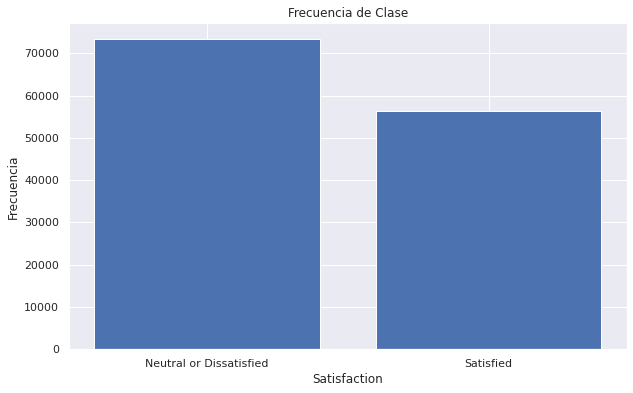

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) ## Cremoas la variable ax, utilizamos la libreria plt.subplots y le signamos las medidas a nuestro gráfico.
ax.bar(serie_Class.index, serie_Class) ## definimos es estilo de nuestro gráfico con el código ax.bar. 
ax.set_title('Frecuencia de Clase') ## Marcamos el titulo del gráfico.
ax.set_ylabel('Frecuencia') ## Definimos el eje y. 
ax.set_xlabel('Satisfaction') ## Definimos el eje x.

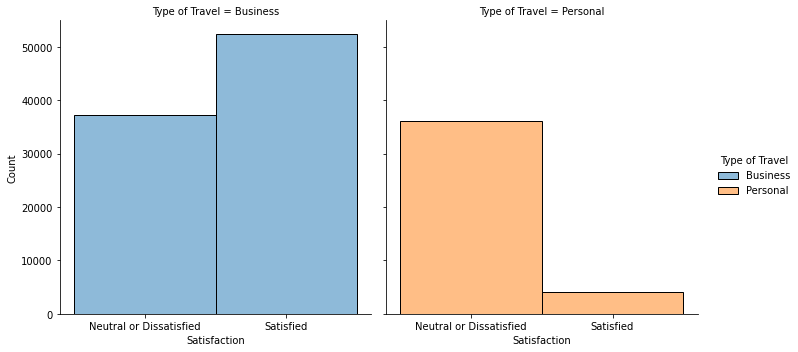

In [ ]:
sns.displot(data=yu, x="Satisfaction", hue="Type of Travel", col="Type of Travel")

In [ ]:
serie_Age=yu.Age.value_counts() ## Creamos la varible seri_age la contar la cantidad de personas con una edad específica.
serie_Age

39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: Age, Length: 75, dtype: int64

In [ ]:
con_cols=['Age','Food and Drink','In-flight Entertainment']
cat_cols=[]
for i in yu.columns:
    if i!='id' and i!='Satisfaction' and i not in con_cols:
        cat_cols.append(i)
cat_cols

['ID',
 'Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'Flight Distance',
 'Departure Delay',
 'Arrival Delay',
 'Departure and Arrival Time Convenience',
 'Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'Gate Location',
 'On-board Service',
 'Seat Comfort',
 'Leg Room Service',
 'Cleanliness',
 'In-flight Service',
 'In-flight Wifi Service',
 'Baggage Handling']

## Frecuencia de Edad

En este otro gráfico de frecuencias podemos ver que el mayor rango de edades se encuentra entre los 20 y 60 años de edad. 

Text(0.5, 0, 'Age')

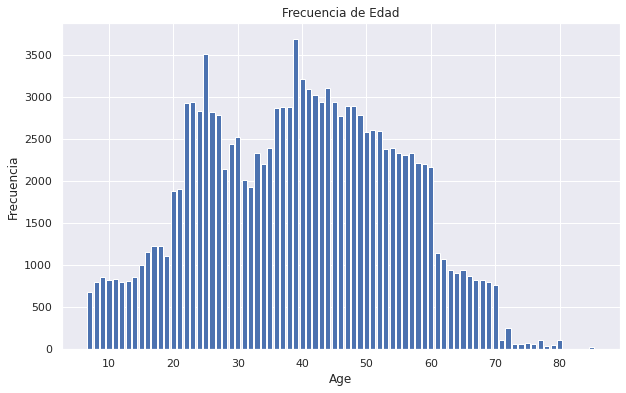

In [ ]:
fig, ax = plt.subplots(figsize=(10,6)) ## Cremoas la variable ax, utilizamos la libreria plt.subplots y le signamos las medidas a nuestro gráfico.
ax.bar(serie_Age.index, serie_Age) ## definimos es estilo de nuestro gráfico con el código ax.bar. 
ax.set_title('Frecuencia de Edad') ## Marcamos el titulo del gráfico.
ax.set_ylabel('Frecuencia') ## Definimos el eje y.
ax.set_xlabel('Age') ## Definimos el eje x.

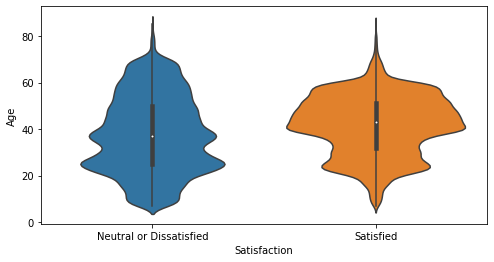

In [ ]:
sns.violinplot(x ="Satisfaction",
             y ="Age",
             data = yu) ## De seaborn, utiulizamos el gráfico violinplot y definimos nuestros ejes X e Y. 
plt.gcf().set_size_inches(8, 4) ## Definos el tamaño de nuestro gráfico.

In [ ]:
yu_2=yu[['Class','Satisfaction']].groupby(by='Satisfaction').count()
yu_2
## Aquí creamos la variable yu_2 para poder realizar nuestro grafico piechart de distribución de satisfacción, puesto en práctica debajo.

,Class
Satisfaction,
Neutral or Dissatisfied,73452
Satisfied,56428


In [ ]:
yu_2.index

Index(['Neutral or Dissatisfied', 'Satisfied'], dtype='object', name='Satisfaction')

## Piechart de distribución de Satisfacción

Dentro de este gráfico de tortas podemos ver el % entre las opiniones de los pasajeros de nuestra base de datos medidas en Neutral/Insatifechos o Satisfechos.

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

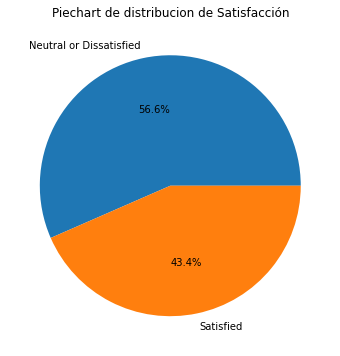

In [ ]:
fig,ax = plt.subplots(figsize =(10, 6)) ## De matplotlib, utilizamos subplots y le asignamos las medidas (10,6) para nuestro tamaño del gráfico.
ax.pie(yu_2.Class, labels = yu_2.index,autopct='%1.1f%%') ## De plt.subplots utilizamos la librería pie para nuestro de gráfico de tortas. yu_2 nuestra variable utilizada.
ax.set_title('Piechart de distribucion de Satisfacción') ## Nombre del gráfico.
serie_Class=yu.Satisfaction.value_counts() 
serie_Class

In [ ]:
yud = yu.drop(['ID'], axis=1) ## Quitamos la variable id para que no interfiera en el mapa de calor.

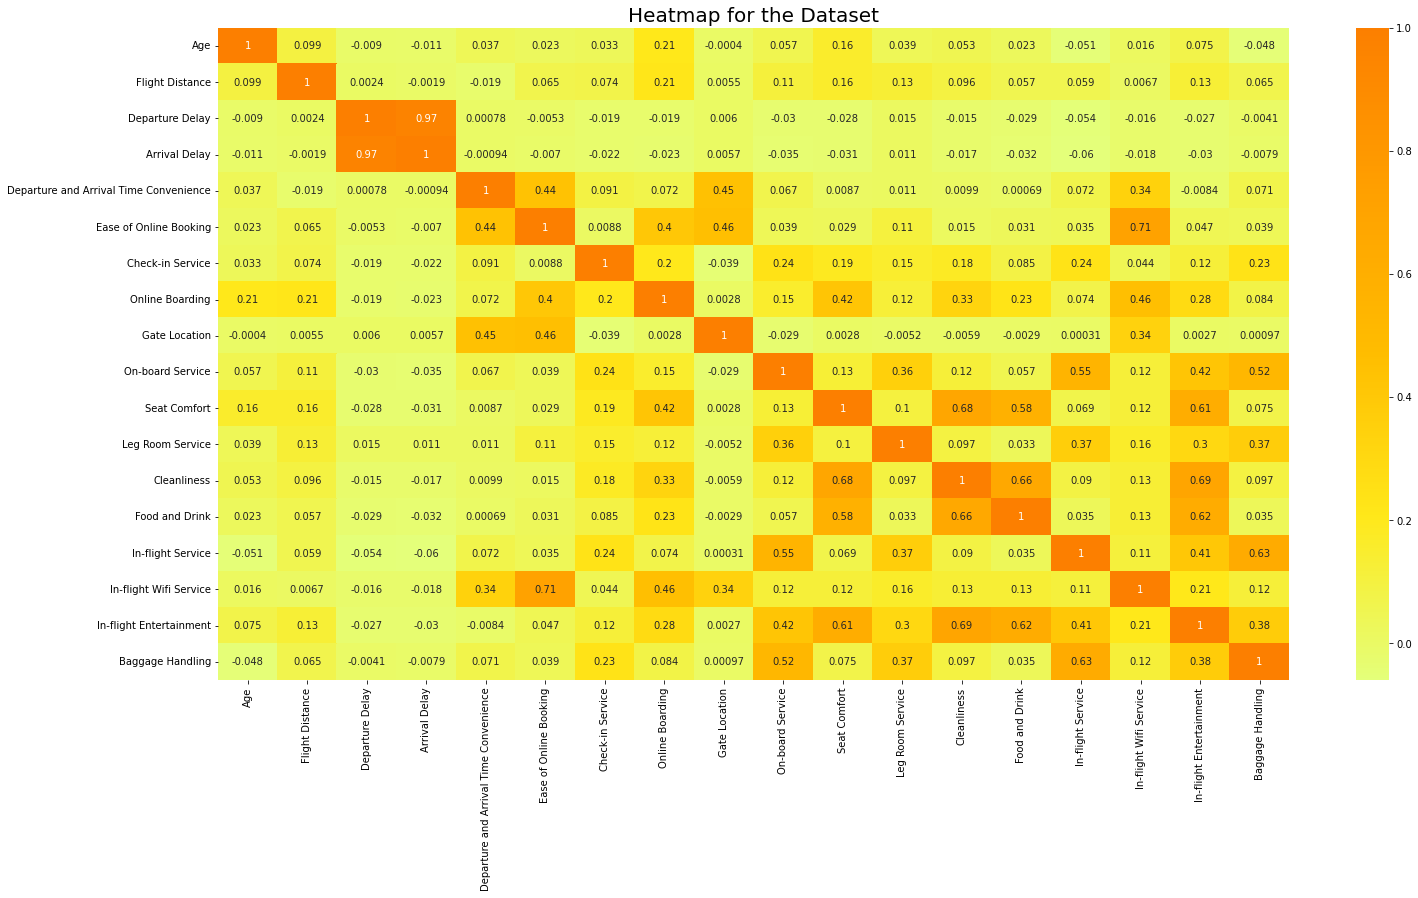

In [ ]:
plt.rcParams['figure.figsize'] = (24, 12)

sns.heatmap(yud.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Grafica de Regresión Seat Comfort - Edad

Aquí podemos ver que exsite una relación positiva
entre la edad y el Seat Confort, el modelo sigue una condición lineal psoitiva hasta que la edad llega los 60 años, luego esa condición se anula. 

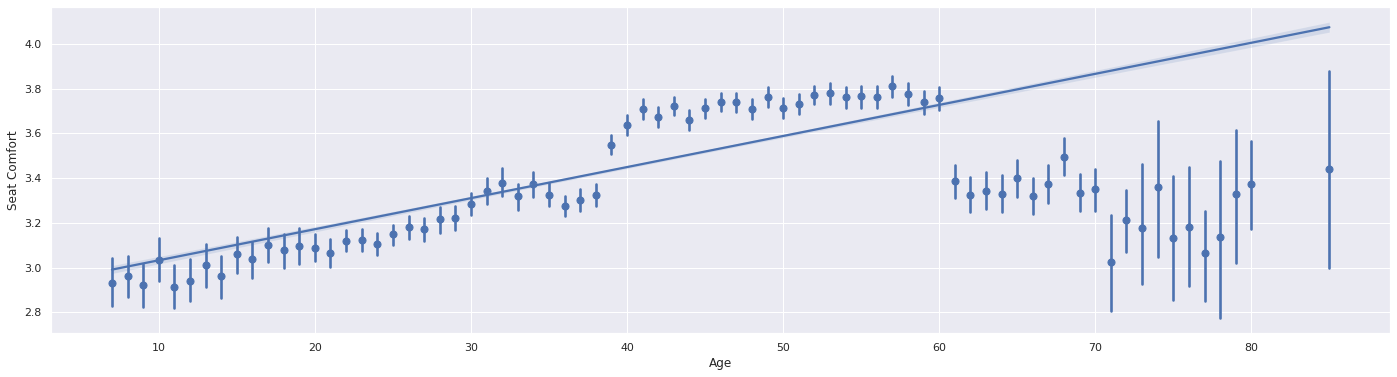

In [ ]:
import numpy as np
sns.regplot(x="Age", y="Seat Comfort",data=yuu, x_estimator=np.mean); ## De seaborn, utilizamos replot para analizar la correlación entre las variables Age y Seat Comfort. np.mean, nuestra medida de cálculo.

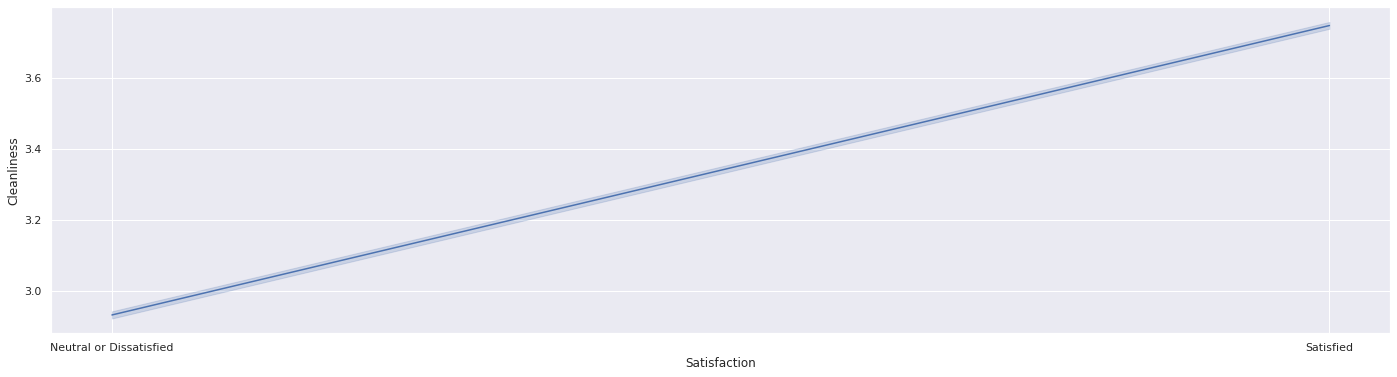

In [ ]:
plt.figure(figsize=(24,6)) ## De matplotlib definimos el tamaño del gráfico.
sns.lineplot(x='Satisfaction', y='Cleanliness',data=yu) ## De seaborn utilizamos lineplot y definimos el eje X e Y de nuestra variable yu.

Aquí podemos ver la misma información de la gráfica de regresión lineal pero en este caso puesto en un gráfico de barras. 

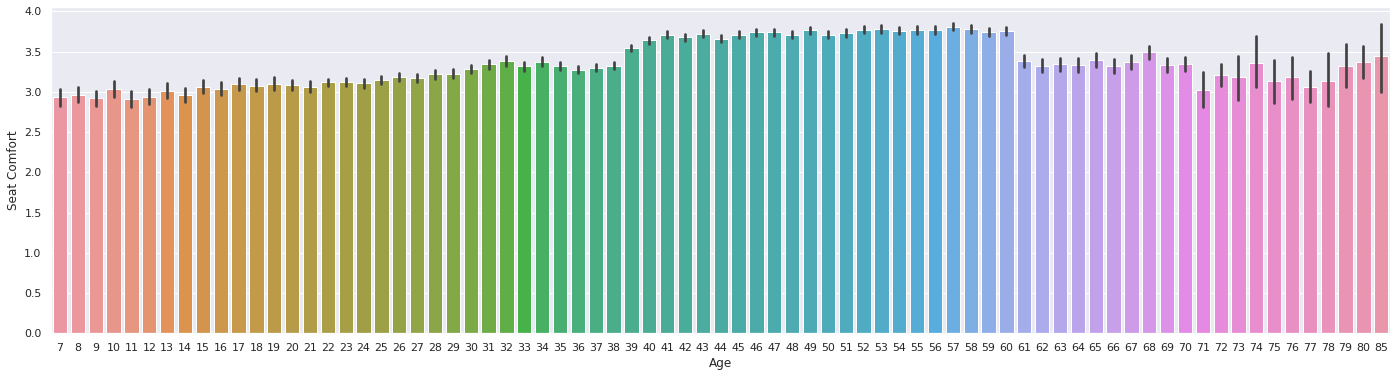

In [ ]:
sns.set(rc = {'figure.figsize':(24,6)}) ## De seaborn definimos el tamaño del gráfico.
g = sns.barplot(data=yu, x="Age", y="Seat Comfort") ## De seaborn utilizamos barplot y definimos nuestros ejes y variables Age par nuestra variable X y Seat Comfort para nuestra variable Y.

En esta ultima gráfica podemos visualizar a la variable Age la cual es probable que sea nuestra variable objetivo a analizar,comparada con respecto a la clase. Lo que apriori podemos ver es que entre las edades de 40 a 60 años los pasajeros tienden a viajar mas en clase executiva. 

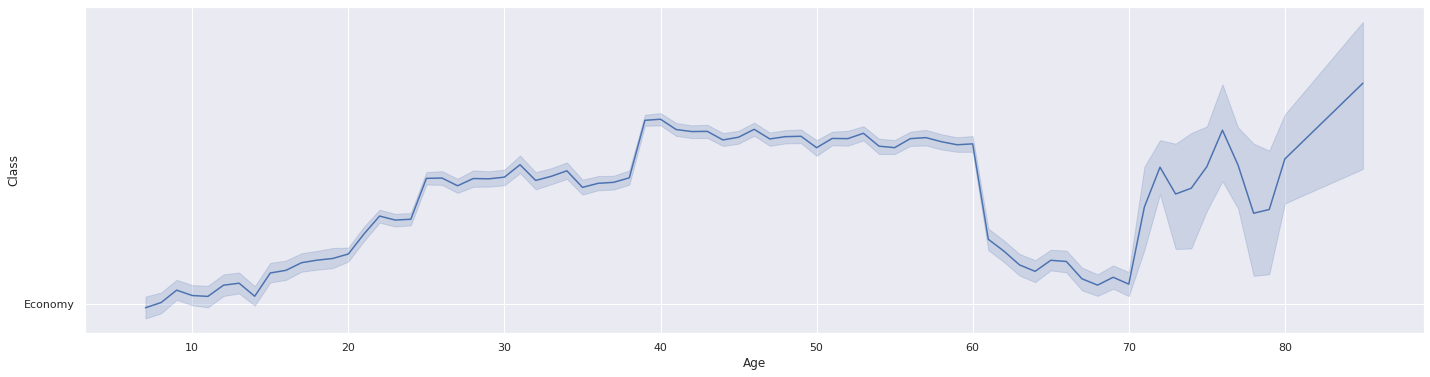

In [ ]:
plt.figure(figsize=(24,6)) ## De matplotlib deifinimos el tamaño de nuestro gráfico.
sns.lineplot(x='Age', y='Class',data=yu) ## De seaborn utilizamos lineplto y definimos nuestros ejes X e Y.

## Feature Selection : Wrapper Methods

## Forward selection

In [ ]:
import statsmodels.api as sm ## Importamos la librería ststmodels.api como sm.
def forward_selection(yuu, target, significance_level=0.05): ## De foward_selections y utilizando nuestra variable yuu, definimos nuestro nivel de significancia.
    initial_features = yuu.columns.tolist() ## Nuestro inicial features.
    best_features = [] ## Best_features es = a....
    while (len(initial_features)>0): ## El parametro "len" que nos sivre para contar la cantidad de caracteres. 
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(yuu[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

In [ ]:
!pip install mlxtend 

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS ## Importamos estas librerías para poder clasificar y definir cuales son las variables mas signicativas de un modelo.
from sklearn.linear_model import LinearRegression ## Importamos linearRefresion.
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

## Variables Foward Selection

In [ ]:
X = yuu.drop(['Satisfaction_Satisfied'], axis=1)
y = yuu['Satisfaction_Satisfied']
## Este código nos sirve para dividir nuestro data set en dos, (x) con con todas nuestras varibles menos nuestra variable objetivo y el otro (y) solo con nuestra variable objetivo.

In [ ]:
sfs.fit(X, y)
sfs.k_feature_names_ 
## Este código pone en práctica al modelo y nos clasifica las variables mas significativas. 

('Ease of Online Booking',
 'Check-in Service',
 'Online Boarding',
 'On-board Service',
 'Leg Room Service',
 'In-flight Wifi Service',
 'In-flight Entertainment',
 'Customer Type_Returning',
 'Type of Travel_Personal',
 'Class_Economy',
 'Class_Economy Plus')

In [ ]:
yuu.columns

## Modelado de Machine Learning

## Random Forest

## Random Forest (1) Accuracy (95%)

Variable Dependiente: Nivel de Satisacción 

Variables Independientes: Todas las colunmas.

Métricas: 

Presición: La presición es igual a Σ(TP)+(FP) / ΣTP.  Del resultado de esta medida podemos obetener cual es la efctividad de respuestas Positivas correctas y Negativas corretas del modelo.

Recall: recall= 
TP+FN
TP
​




In [ ]:
X = yuu.drop(['Satisfaction_Satisfied'], axis=1) ## Definimos nuestra variable x.
y = yuu['Satisfaction_Satisfied'] ## Definimos nuestra variable y.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=1) ## Dedimos que nuestro modelo se entrenará con el 80 % de nuestras variables y con el 20% restante se pondrá en práctica.
modelo = RandomForestClassifier(random_state=1) ## Utilizamos el modelado de randomforestclassifier.
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

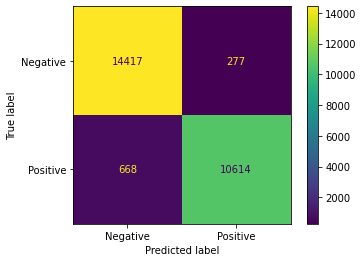

In [ ]:
plt.figure(figsize=(10,6)) ## Definimos las medidas de nuestra matriz.
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive']) ## De metrics utilizamos plot_confusion_matrix para mostrar los resultados de nuestro Randomforest.

In [ ]:
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

Text(0.5, 0, 'Random Forest Feature Importance')

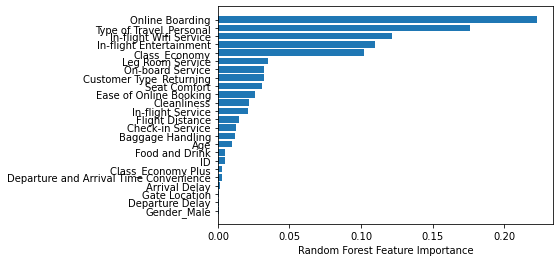

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
## De esta matriz de confunsión podemos obtener 14417 negativos reales y 277 falsos negativos. 
## Además 668 positivos falsos y 10614 positivos reales.
## Debajo en base a estos resultados la eficacia de nuestro modelo.

**Recall:** 

Neutral Disatisfied  = 14417 / (14417 + 277) = 0.98

Satisfied = 10614 / (668 + 10614) = 0.94

**Precision:** 

Nesutral Disatisfied = 14417 / (14417 + 668) = 0.96

Satisfied = 10614 / (10614 + 277) = 0.97

**Fi Scored** : 

Neutral Disatisfied = (0.98 x 0.96) / (0.96 + 0.98) = 0.97

Satisfied = (0.94 x 0.97) / (0.94 + 0.98) = 0.96 






In [ ]:
print(metrics.classification_report(y_test, preds)) 

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14694
           1       0.97      0.94      0.96     11282

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
# Modelo 1
model.set_params(**params_1).fit(X_train, y_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(X_train, y_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(X_train, y_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(y_test, model.predict(X_test)), 5)}')

Accuracy para Modelo 1 = 0.9058
Accuracy para Modelo 2 = 0.92736
Accuracy para Modelo 3 = 0.94772


In [ ]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7],
        'criterion':['entropy','gini']
        }

# Randomized Search CV

In [ ]:
## 5 minutos en correr.
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'subsample': 1.0, 'min_child_weight': 5, 'max_depth': 7, 'gamma': 0.5, 'criterion': 'gini', 'colsample_bytree': 0.6}
Mejor score de CV 0.9398290774254227
Accuracy del modelo = 0.93906


# Halving Grid Search

In [ ]:
## 11 Minutos en correr.
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(X_train, y_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, halving_cv.predict(X_test)), 5)}')

Mejores parametros {'colsample_bytree': 0.6, 'criterion': 'gini', 'gamma': 1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1.0}
Mejor Score CV 0.939872872455515
Accuracy del modelo = 0.93929


## Random Forest (2) Accuracy (96%)

Variable Dependiente: Nivel de Satisfacción

Variables Indepenientes: Variables Fowrd Selection.

In [ ]:
Xx = yuu[['Ease of Online Booking','Check-in Service','Online Boarding','On-board Service','Leg Room Service','Cleanliness','In-flight Wifi Service','Baggage Handling','Customer Type_Returning','Type of Travel_Personal']]       # Definimos nuestra variable X.
yx = yuu['Satisfaction_Satisfied'] ## Definimos nuestra variable Y.
Xx_train, Xx_test, yx_train, yx_test = train_test_split(Xx,yx,test_size=0.2, random_state=1) ## Dedimos que nuestro modelo se entrenará con el 80 % de nuestras variables y con el 20% restante se pondrá en práctica.
modeloo = RandomForestClassifier(random_state=1) ## Modelo randomforest.
modelo.fit(Xx_train, yx_train) ## Entrenamos a nuestro modelo en base a los parametros Xx_train e yx_train.
predss = modelo.predict(Xx_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 720x432 with 0 Axes>

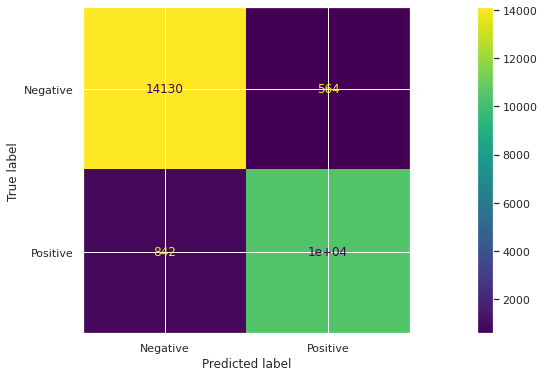

In [ ]:
plt.figure(figsize=(10,6)) ## Definimos el tamaño de nuestra matriz.
metrics.plot_confusion_matrix(modelo, Xx_test, yx_test, display_labels=['Negative', 'Positive']) ## De metrics, utilizamos plot_confusion_matrix para visulizar los resultados de nuestro Randomclassifier.

In [ ]:
## De 14694 muestras se obtuvieron 14130 correctos negativos y 564 falsos negativos. Estos resultados provienen del 20% de nuestro data set.
## De 11282, obtuvimos 842 falsos positivos y 10440 positivos correctos.
## Debajo en base a estos resultados la eficacia de nuestro modelo.

Text(0.5, 0, 'Random Forest Feature Importance')

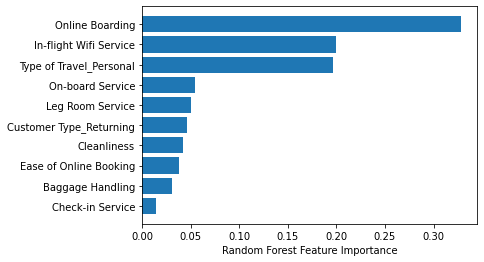

In [ ]:
sorted_idx = clf.feature_importances_.argsort()
plt.barh(Xx_train.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
clf = RandomForestClassifier(max_depth=6, random_state=42, n_estimators=30,criterion='gini')
clf.fit(Xx_train, yx_train)

RandomForestClassifier(max_depth=6, n_estimators=30, random_state=42)

**Recall:** 

Neutral Disatisfied  = 14130 / (14130 + 564) = 0.96

Satisfied = 10440 / (842 + 10440) = 0.94

**Precision:** 

Nesutral Disatisfied = 14130 / (14130 + 842) = 0.93

Satisfied = 10440 / (10440 + 564) = 0.95

**Fi Scored** : 

Neutral Disatisfied = (0.9x x 0.9x) / (0.9x + 0.9x) = 0.97

Satisfied = (0.9x x 0.9x) / (0.9x + 0.9x) = 0.96 

In [ ]:
print(metrics.classification_report(yx_test, preds))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14694
           1       0.97      0.94      0.96     11282

    accuracy                           0.96     25976
   macro avg       0.97      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976



## Hypertuning De Parametros Para variables Del Random Forest 2.

In [ ]:
model= xgb.XGBClassifier(learning_rate=0.001)
# Lista de hiperparametros
params_1 = {'criterion': 'gini', 'splitter': 'best', 'max_depth': 5}
params_2 = {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 7}
params_3 = {'criterion': 'gini', 'splitter': 'random', 'max_depth': 10}

In [ ]:
# Modelo 1
model.set_params(**params_1).fit(Xx_train, yx_train)
print(f'Accuracy para Modelo 1 = {round(accuracy_score(yx_test, model.predict(Xx_test)), 5)}')
# Modelo 2
model.set_params(**params_2).fit(Xx_train, yx_train)
print(f'Accuracy para Modelo 2 = {round(accuracy_score(yx_test, model.predict(Xx_test)), 5)}')
# Modelo 3
model.set_params(**params_3).fit(Xx_train, yx_train)
print(f'Accuracy para Modelo 3 = {round(accuracy_score(yx_test, model.predict(Xx_test)), 5)}')

Accuracy para Modelo 1 = 0.90314
Accuracy para Modelo 2 = 0.92951
Accuracy para Modelo 3 = 0.9371


In [ ]:
params_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5,6,7],
        'criterion':['entropy','gini']
        }

# Randomized Search CV

In [ ]:
## 3 Minutos en correr.
grid_cv = RandomizedSearchCV(model, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(Xx_train, yx_train)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(yx_test, grid_cv.predict(Xx_test)), 5)}')

Mejores parametros {'subsample': 1.0, 'min_child_weight': 1, 'max_depth': 7, 'gamma': 1, 'criterion': 'entropy', 'colsample_bytree': 0.6}
Mejor score de CV 0.9318120435621536
Accuracy del modelo = 0.93159


# Halving Grid Search

In [ ]:
## 7 minutos en correr
halving_cv = HalvingGridSearchCV(model, params_grid, scoring="accuracy", factor=3)
halving_cv.fit(Xx_train, yx_train)

print("Mejores parametros", halving_cv.best_params_)
print("Mejor Score CV", halving_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(yx_test, halving_cv.predict(Xx_test)), 5)}')

Mejores parametros {'colsample_bytree': 0.8, 'criterion': 'gini', 'gamma': 1.5, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 1.0}
Mejor Score CV 0.9367621655004731
Accuracy del modelo = 0.93494


## Decision Tree (1) Accuracy (88%)

In [ ]:
!pip install scikit-plot

In [ ]:
import scikitplot as skplt ## Importamos la librería scikiplot como sklt.
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report 

Accuracy: 0.8831228826609178
ROC AUC Score: 0.9219023102913209


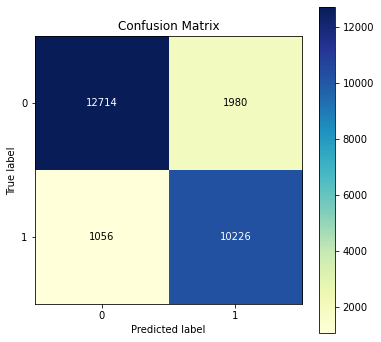

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree ## Imortamos el modelo Treeclassifier.
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=3) # creamos el modelo dtc con el algoritmo de DecisionTreeClassifier
dtc.fit(X_train,y_train) ## Entrenamos el modelo.
y_pred_dtc = dtc.predict(X_test) #obtengo los casos clasificados de X_test con el modelo 
y_pred_prob_dtc = dtc.predict_proba(X_test)[:, 1]

skplt.metrics.plot_confusion_matrix(y_test, y_pred_dtc, figsize=(6,6), cmap= 'YlGnBu'); ## De skplt utilizamos metrics.plot para visualizar nuestra matrix, luego definimos nuestros ejes y el tamaño de nuestro gráfico.
print('Accuracy:', accuracy_score(y_test, y_pred_dtc)) 
print('ROC AUC Score:', roc_auc_score(y_test, y_pred_prob_dtc))

In [ ]:
## De 14694 muestras se obtuvieron 12714 correctos negativos y 1980 falsos negativos. Estos resultados provienen del 20% de nuestro data set.
## De 11282, obtuvimos 1056 falsos positivos y 10226 positivos correctos.

**Recall:** 

Neutral Disatisfied  =  12714 / (12714 + 1980) = 0.87

Satisfied = 10226 / (1056 + 10226) = 0.91

**Precision:** 

Nesutral Disatisfied = 12714 / (12714 + 1056) = 0.9

Satisfied = 10440 / (10440 + 564) = 0.95

**Fi Scored** : 

Neutral Disatisfied = (0.9x x 0.9x) / (0.9x + 0.9x) = 0.97

Satisfied = (0.9x x 0.9x) / (0.9x + 0.9x) = 0.96 

In [ ]:
from sklearn import metrics # vamos a medir el desempeño
print(metrics.classification_report(y_test, y_pred_dtc)) #obtenemos las metricas de clasificacion

              precision    recall  f1-score   support

           0       0.92      0.87      0.89     14694
           1       0.84      0.91      0.87     11282

    accuracy                           0.88     25976
   macro avg       0.88      0.89      0.88     25976
weighted avg       0.89      0.88      0.88     25976



In [ ]:
feature_names = X_test.columns # obtenemos el nombre de las variables que estan en el dataset de training
feature_names

Index(['ID', 'Age', 'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Gender_Male',
       'Customer Type_Returning', 'Type of Travel_Personal', 'Class_Economy',
       'Class_Economy Plus'],
      dtype='object')

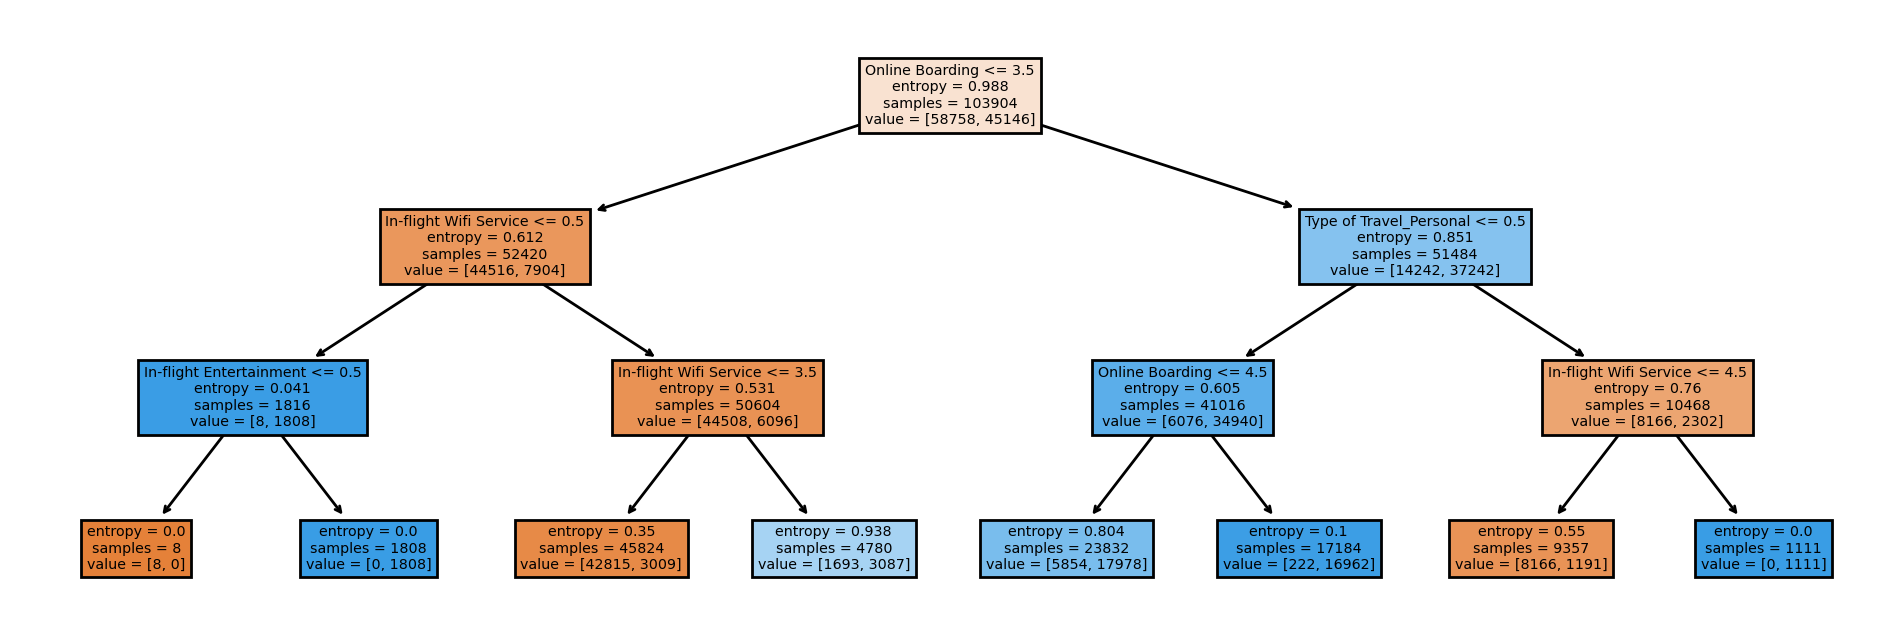

In [ ]:
plt.figure(figsize=(12, 4), dpi=200)
plot_tree(dtc, feature_names=feature_names, filled=True) #graficamos el arbol del modelo dtc con los feature names obtenidos
plt.show()

In [ ]:
## En base a los 3 modelos implementados, el arbol de decision fue el que nos brindo el accruacy mas bajo, 
## El Randomforest con nuestras variables seleccionadas del foward selection fue el que nos brindó la mayor eficacia con el accuracy mas alto entre los 3 modelos.

In [ ]:
## En base a nuestro análizis podemos decir que el in-flight wifi service es una de nuestras variables mas sifnificativas. 
## Esto nos quiere decir que para los pasajeros que obtuvieron wifi en su vuelo los motivo a brindar mejores calificaciones. 
## Una conclusión al respecto puede ser incorporar wifi en los vuelos va a traer mayores calificaciones positivas de parte de los pasajeros.

## Respuestas/Conclusiones

1) Existen dentro de nuestro modelo de análisis variables significativas con un Pvalue menor a 0.05.

1.2) ('Ease of Online Booking') ('Check-in Service') ('Online Boarding')('On-board Service') ('Leg Room Service') ('Cleanliness') ('In-flight Wifi Service') ('Baggage Handling') ('Customer Type_Returning') ('Type of Travel_Personal') ('Class_Business') 

2) Lo que pudimos ver con respecto a la edad, es que la edad no es condicional para determinar el nivel de satisfaccón de un pasajero. Dado el metodo de Foward selection la edad no entra de nuestras variables significativas a un Pvalue 0.05. Esto se explica debido a que luego de los 60 años el nivel de satiscacción deciende y complica el análisis del modelo.

3) No es posible determinar el nivel de satisfacción conociendo solo el genero del pasajero.

## Hipotesis: 

1) La edad será una de las variables mas significativas del modelo.

2 ) La variable objetivo dependerá de la clase en la que los pasajeros viajaron.

3 ) Existen más calificaciones positivas que negativas.

1) Es falsa

2) Es verdadera

3) Es falsa